In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
dataset = '/content/drive/MyDrive/dataset.zip'

In [3]:
import zipfile
with zipfile.ZipFile('dataset.zip') as file:
    file.extractall()

In [4]:
training_data = 'dataset/training_set'
test_data = 'dataset/test_set'

In [5]:
# import vgg16 library to use imagenet weights
vgg19 = VGG19(input_shape = (128,128,3),
            weights='imagenet',
            include_top = False
)

In [6]:
# dont train existing weights
for layer in vgg19.layers[:-4]:
  layer.trainable = False

In [7]:
# Create the model by adding layers on top of vgg19 model
x = vgg19.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class

In [8]:
# create model 
model = Model(inputs=vgg19.input, outputs=prediction)

In [32]:
model.summary()
# model.save("OneDrive/Desktop/projects")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 59,355,205 (226.42 MB)

 Trainable params: 15,470,081 (59.01 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

 Optimizer params: 30,940,164 (118.03 MB)

In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6362 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [14]:
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=90,
    validation_data=test_set,
    validation_steps=len(test_set)
    )

Epoch 1/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 1621s 8s/step - accuracy: 0.9663 - loss: 0.1262 - val_accuracy: 0.9800 - val_loss: 0.0322
Epoch 2/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 1404s 7s/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9900 - val_loss: 0.0269
Epoch 4/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 1369s 7s/step - accuracy: 0.9914 - loss: 0.0242 - val_accuracy: 0.9950 - val_loss: 0.0165
Epoch 6/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 1382s 7s/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9600 - val_loss: 0.1139
Epoch 8/90
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s

In [8]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_set)
print(f'Overall Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Overall Test Loss: {test_loss * 100:.2f}%')

NameError: name 'history' is not defined

NameError: name 'history' is not defined

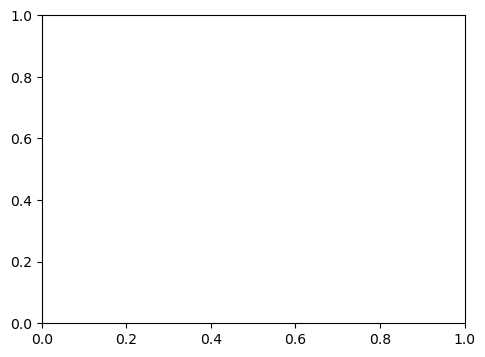

In [9]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

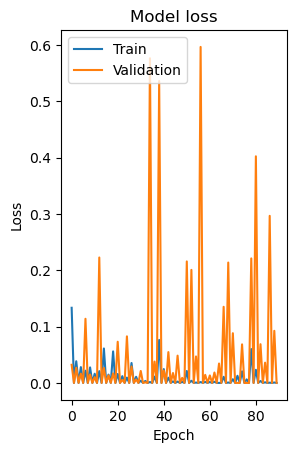

In [17]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 78s 10s/step


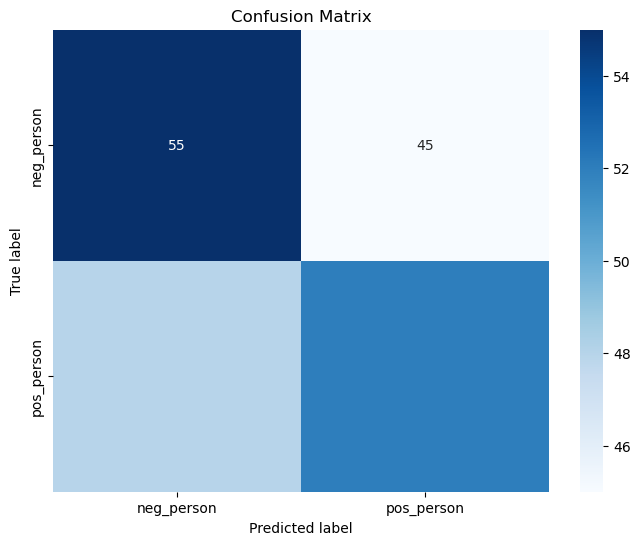

In [23]:
# Plot confusion matrix
Y_pred = model.predict(test_set)
y_pred = np.round(Y_pred).astype(int).flatten()
y_true = test_set.classes
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()